In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
test_data = pd.read_csv(r"C:\Users\Saikiran\Desktop\test.csv")


In [14]:
test_data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [17]:
test_data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [18]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [19]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [20]:
test_data.mean()

x    50.936667
y    51.205051
dtype: float64

In [21]:
test_data.median()

x    53.000000
y    52.170557
dtype: float64

In [22]:
test_data.mode()

,x,y
0,21.0,-3.467884
1,46.0,-2.819914
2,55.0,-2.761183
3,NaN,-2.344739
4,NaN,-1.632968
...,...,...
295,NaN,99.873827
296,NaN,101.069788
297,NaN,103.526616
298,NaN,105.450379


In [26]:
test_data.dropna(inplace=True)


<AxesSubplot:>

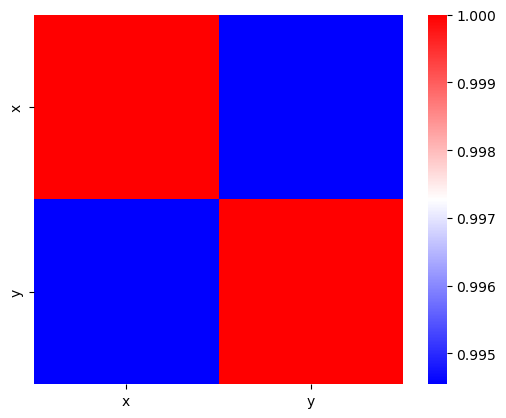

In [30]:
import seaborn as sns
correlations = test_data.corr()
sns.heatmap(data = correlations,square = True, cmap = "bwr")


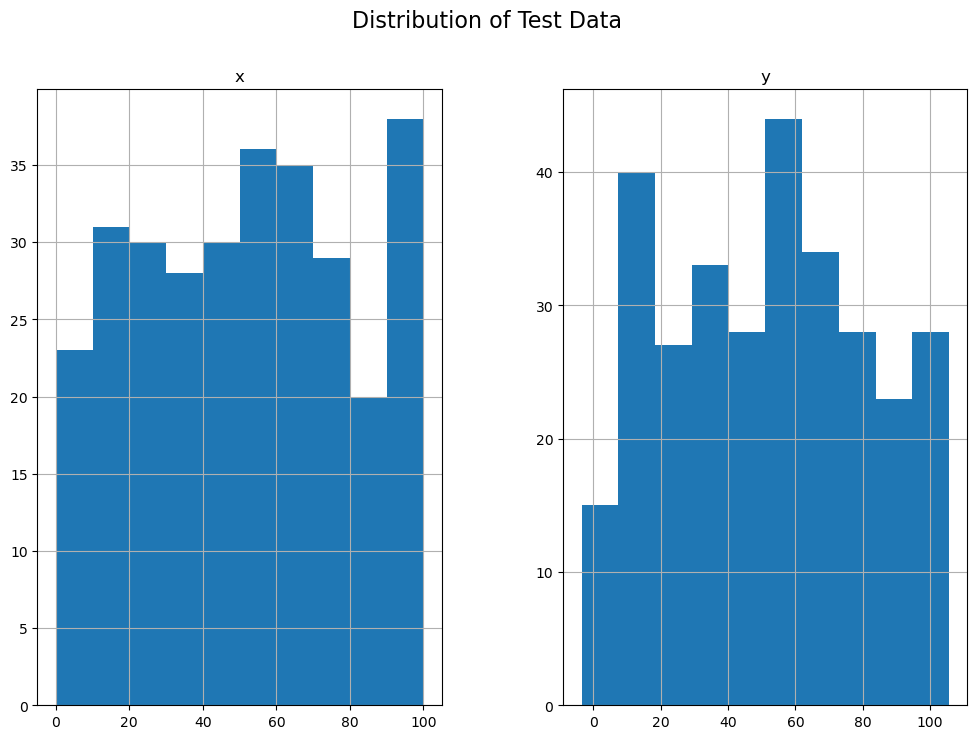

In [31]:
import matplotlib.pyplot as plt
def plot_histograms(test_data, title):
    test_data.hist(figsize=(12, 8))
    plt.suptitle(title, fontsize=16)
    plt.show()
plot_histograms(test_data, "Distribution of Test Data")


In [33]:
X_test=test_data['x']

In [34]:
y_test=test_data['y']

In [35]:
loaded_data = joblib.load('linearregressionmodel.pkl')


In [36]:
model = loaded_data['model']


In [37]:
X_test = X_test.values.reshape(-1, 1)


In [38]:
predictions = model.predict(X_test)


In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2806567.1544727916
R-squared: -3330.894146130958


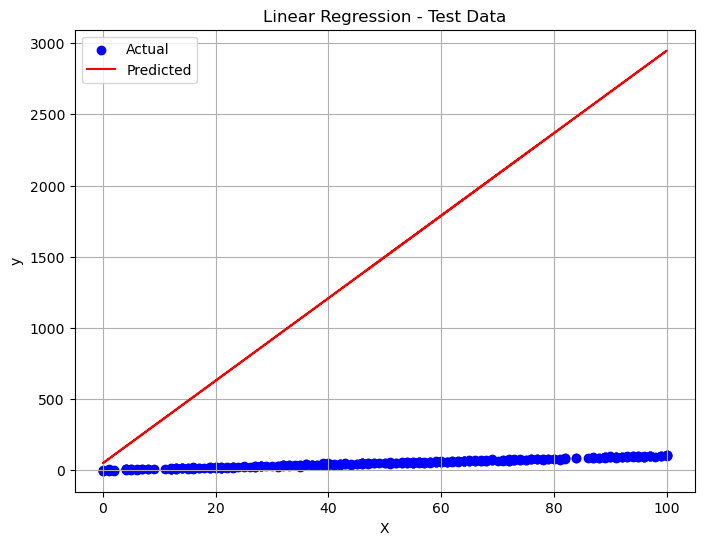

In [41]:
# Plotting the linear regression line on the test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')  # Plotting actual data points
plt.plot(X_test, predictions, color='red', label='Predicted')  # Plotting predicted values
# Adding labels and title
plt.title('Linear Regression - Test Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()